# Evaluation Metrics for Classification

### 1) Kaggle 챌린지를 이어서 진행합니다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
target = 'vacc_h1n1_f'
# target = 'vacc_seas_f'
train = pd.merge(pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'), 
                 pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv')[target], left_index=True, right_index=True)
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv')
sample_submission = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/submission.csv')

In [3]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)


train.shape, val.shape, test.shape

((33723, 39), (8431, 39), (28104, 38))

In [4]:
# 타켓 비율을 살펴보기 & 기준모델 설정
train[target].value_counts(normalize=True)

0    0.760935
1    0.239065
Name: vacc_h1n1_f, dtype: float64

In [5]:
train.select_dtypes('float').T

,20365,29138,36128,39793,32973,31450,17541,33946,5300,34292,...,15981,35280,14173,9193,34753,8747,4412,19064,40906,30904
h1n1_concern,1.0,1.0,2.0,2.0,0.0,0.0,3.0,2.0,2.0,3.0,...,3.0,2.0,2.0,3.0,0.0,NaN,3.0,NaN,NaN,2.0
h1n1_knowledge,1.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,...,0.0,1.0,1.0,1.0,2.0,NaN,2.0,NaN,NaN,1.0
behavioral_antiviral_meds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0
behavioral_avoidance,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,NaN,1.0,NaN,NaN,0.0
behavioral_face_mask,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,0.0
behavioral_wash_hands,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0
behavioral_large_gatherings,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,0.0
behavioral_outside_home,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,1.0
behavioral_touch_face,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0
doctor_recc_h1n1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
train.T.duplicated()

h1n1_concern                   False
h1n1_knowledge                 False
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home        False
behavioral_touch_face          False
doctor_recc_h1n1               False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_insurance               False
health_worker                  False
opinion_h1n1_vacc_effective    False
opinion_h1n1_risk              False
opinion_h1n1_sick_from_vacc    False
opinion_seas_vacc_effective    False
opinion_seas_risk              False
opinion_seas_sick_from_vacc    False
agegrp                         False
education_comp                 False
raceeth4_i                     False
sex_i                          False
inc_pov                        False
marital                        False
r

타켓과 음의 상관관계를 갖는 컬럼을 제거해보았다. 

In [8]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

제거하기 전 검증 정확도 :  0.7526983750444787

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder

In [10]:
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42, n_jobs=-1, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)

검증 정확도 0.7642035345747835


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      6416
           1       0.91      0.01      0.03      2015

    accuracy                           0.76      8431
   macro avg       0.84      0.51      0.45      8431
weighted avg       0.80      0.76      0.67      8431



### 2) 본인이 개발한 모델에 대한 confusion matrix를 그려보세요. 
- (도전과제🔥) 각 평가지표에 대해 결과를 최대한 분석하고 무엇이 부족한지, 어떤 방향으로 성능을 높여야 하는지 논하세요.

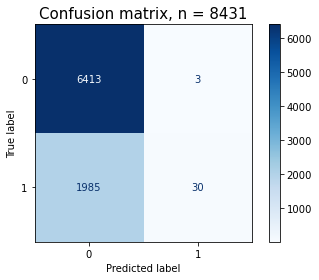

In [12]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [13]:
cm = pcm.confusion_matrix
cm

array([[6413,    3],
       [1985,   30]], dtype=int64)

In [14]:
correct_predictions = np.diag(cm).sum()
correct_predictions

6443

### 3) 랜덤포레스트의 n_estimator를 10, 100, 1000으로 바꾸어 가며 predict_proba를 비교해 보세요

In [15]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42, n_jobs=-1, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)

검증 정확도 0.7901791009370182


C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


In [16]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42, n_jobs=-1, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)

검증 정확도 0.7642035345747835


In [17]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=42, n_jobs=-1, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)

검증 정확도 0.7671687818764085


### 4) 두개 이상의 다른 분류 모델을 학습시켜 ROC curve, AUC 점수를 비교하고 설명합니다.

In [18]:
import seaborn as sns
threshold = 0.25

y_pred_proba = pipe.predict_proba(X_val)[:, 1]
y_pred = y_pred_proba > threshold
final_pred = y_pred.astype(int)


array([1, 0, 0, ..., 0, 0, 0])

False    5542
True     2889
dtype: int64

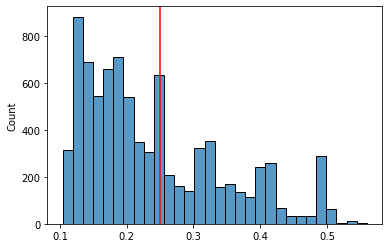

In [19]:
ax = sns.histplot(y_pred_proba)
ax.axvline(threshold, color='red')

pd.Series(y_pred).value_counts()

In [20]:
from ipywidgets import interact, fixed

def explore_threshold(y_true, y_pred_proba, threshold=0.5):
    y_pred = y_pred_proba >= threshold
    vc = pd.Series(y_pred).value_counts()
    ax = sns.histplot(y_pred_proba, kde=True)
    ax.axvline(threshold, color='red')
    ax.set_title(f'# of target, 1={vc[1]}, 0={vc[0]}')
    plt.show()
    print(classification_report(y_true, y_pred))

    
interact(explore_threshold, 
    y_true=fixed(y_val), 
    y_pred_proba=fixed(y_pred_proba), 
    threshold=(0, 1, 0.01));

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [21]:
pred_proba = pd.DataFrame({
    'y_val': y_val,
    'pred_proba': y_pred_proba})
pred_proba

,y_val,pred_proba
18885,1,0.322125
8587,0,0.202842
17917,0,0.245332
27985,0,0.413695
917,0,0.155862
...,...,...
25383,1,0.410875
37833,0,0.216608
6921,0,0.163853
2706,0,0.167147


In [22]:
from sklearn.metrics import roc_curve

# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.559951
1,0.000000,0.000496,0.559951
2,0.000000,0.009926,0.510270
3,0.000000,0.010918,0.510230
4,0.000000,0.016377,0.508856
...,...,...,...
2344,0.993766,0.999007,0.109345
2345,0.993766,0.999504,0.109287
2346,0.995012,0.999504,0.108394
2347,0.995012,1.000000,0.108199


In [23]:
# threshold 최대값의 인덱스, np.argmax()
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 1259 , threshold: 0.2504921442208222


In [24]:
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_val, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      6416
           1       0.49      0.71      0.58      2015

    accuracy                           0.76      8431
   macro avg       0.69      0.74      0.70      8431
weighted avg       0.80      0.76      0.77      8431



auc_score 계산

In [25]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.8156373566703589

### 5) Kaggle 챌린지에 결과를 submission 합니다.

In [40]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=10000, max_depth=15, random_state=42, n_jobs=-1, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))
y_pred = pipe.predict(X_val)
y_pred

검증 정확도 0.8308622939153125


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

threshold = 0.25로 하였을 때 최적으로 검사되어 0.25로 test를 진행토록 하겠습니다. 

0.83으로 과적합이 아닐까 조심스럽게 우려해봅니다.  
그러나, 테스트해볼 수 있는데까지 테스트를 진행해보고자 합니다. 

In [47]:
threshold = 0.25

y_pred_proba = pipe.predict_proba(X_test)[:, 1]
y_pred = y_pred_proba > threshold
final_pred = y_pred.astype(int)

In [46]:
sample_submission
sample_submission["vacc_h1n1_f"] = final_pred
sample_submission.to_csv("submission.csv", index=False)

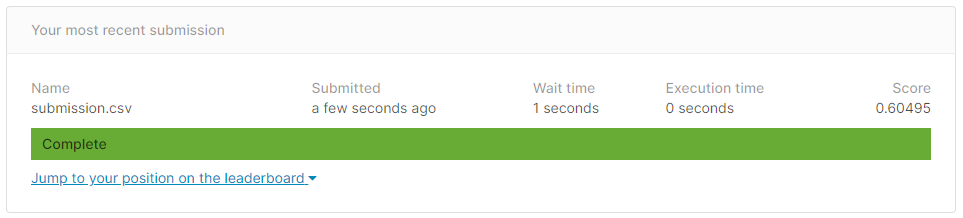